In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from natsort import natsorted
import emoji
import re
from nltk.corpus import stopwords
from collections import OrderedDict
from wordcloud import WordCloud

%matplotlib inline

In [3]:
inputs = []
for file in os.listdir("youtube"):
    if file.endswith(".json"):
        inputs.append(os.path.join("youtube", file))

with open('datasets.json', 'w', encoding='utf8') as outfile:
    for fname in inputs:
        with open(fname, errors='ignore', encoding='utf8') as infile:
            for line in infile:
                outfile.write(line)

In [5]:
dataset=pd.read_json("datasets.json")
dataset

,cid,text,time,author,channel,votes,photo,heart,reply,time_parsed
0,UgzbJlWoD_X_gdtbNsF4AaABAg,Tetap sarungan ygy. So Proudddddddly,2 minggu yang lalu,D A R D,UCGZNgURbfIZiJHzgSo1E9Cg,0,https://yt3.ggpht.com/Q9y3gV4xJmfHPZuQZICynzoj...,False,False,1.677478e+09
1,UgzQ3R9rwn360ENvbph4AaABAg,Hehehe...siapa yg mau berdiam di ikn selama ng...,2 minggu yang lalu (diedit),Mr. Budy K,UCB_U6bErJtSz1-FMKOX5W0g,0,https://yt3.ggpht.com/ytc/AL5GRJU7tkdS0bfeSyJI...,False,False,1.677478e+09
2,UgyScFUmB545fdDY3M94AaABAg,Inilah Betapa Kerennya INDONESIA Punya Preside...,4 bulan yang lalu,INDONESIA ELITE GROUP,UCnybSKJpP3p_4oc9Ss3rgdg,0,https://yt3.ggpht.com/YuPvXA-Su2h-_NeVYMvI5uWr...,False,False,1.668319e+09
3,UgxlVaOYh-cmJq9dc-l4AaABAg,Esemka bagian 2...eh 3...eh...4...eh 5...eh lu...,4 bulan yang lalu,anbanasable,UCrTqooKl3eKz3QmGnN7ZpPg,0,https://yt3.ggpht.com/ytc/AL5GRJUwS4g2Zc3KcKS3...,False,False,1.668319e+09
4,UgyAtVb8TfozPdcbp9d4AaABAg,Kalo bisa 1 periode lagi untuk menunggu titik ...,4 bulan yang lalu,DANIEL MIAN,UC0gJSuyKmpc0HecY_LKVSgw,0,https://yt3.ggpht.com/ytc/AL5GRJXmUOr2_-h2s8AB...,False,False,1.668319e+09
...,...,...,...,...,...,...,...,...,...,...
77785,UgylA1vnRSa6oekpndN4AaABAg.9mR04lq5LLR9mRKNUSm5w1,@H_CROW \nJadi teringat ratu yg suka marah d...,2 minggu yang lalu,Ade Saputra,UCDlfelT8hPEq-FzIxQsQM6Q,1,https://yt3.ggpht.com/ytc/AL5GRJXApK9JjRN8GuC3...,False,True,1.677479e+09
77786,UgyXBAOUPZ8n_aiWkGh4AaABAg.9mR-vJOz4hV9mR0_b64QAk,"Adanya gagasan dari presiden terdahulu, ditamb...",2 minggu yang lalu,Jo Ramen,UCrVAYI10MrDQ1jEiNq9_flw,3,https://yt3.ggpht.com/Mc0Pc5h6uA2zX0swGTdzbxl8...,False,True,1.677479e+09
77787,Ugz41Uz4ny9GGE_9LIB4AaABAg.9mR-A6tOM0w9mR1AIoku0Q,"Wahahaha,,,, sakit hati kah bos",2 minggu yang lalu,Arif Nawawi,UCtC6vWZ0TCA52XnNZ_B7aOQ,3,https://yt3.ggpht.com/ytc/AL5GRJUKp0r4YlDe-T5r...,False,True,1.677479e+09
77788,Ugz41Uz4ny9GGE_9LIB4AaABAg.9mR-A6tOM0w9mR2AIZcD7_,belajarlah berbaik sangka bung,2 minggu yang lalu,herman allek alek,UCXyUR9urhjvj5qwPH2fqZ1w,1,https://yt3.ggpht.com/ytc/AL5GRJX8ojvWt-cS9xNn...,False,True,1.677479e+09


In [6]:
dataset['time']=dataset['time'].str.replace(" (diedit)","",regex=False)
dataset['time']=dataset['time'].str.replace("1 tahun yang lalu","12 bulan yang lalu",regex=False)
dataset['time']=dataset['time'].str.replace("[0-9]+ [minggu|hari|jam|menit]+ yang lalu","0 bulan yang lalu",regex=True)
dataset['waktu']=dataset['time']
bulan=["Maret 2023","Februari 2023","Januari 2023","Desember 2022","November 2022","Oktober 2022","September 2022","Agustus 2022","Juli 2022","Juni 2022","Mei 2022","April 2022","Maret 2022"]
bulan.reverse()
for i in reversed(range(len(bulan))):
    teks=str(i)+" bulan yang lalu"
    dataset['time']=dataset['time'].str.replace(teks,bulan[i],regex=False)

dataset['waktu'] = pd.Categorical(dataset['waktu'], ordered=True, categories= natsorted(dataset['waktu'].unique()))

dataset = dataset.sort_values('waktu')
dataset.drop(columns=['cid','author','channel','votes','photo','heart','reply','time_parsed'],inplace=True)

dataset['text']=dataset['text'].str.replace(u'\xa0[^<]*\xa0',"",regex=True)
dataset['text'] = dataset['text'].apply(lambda s: emoji.replace_emoji(s, ''))
dataset['text']=dataset['text'].str.lower()
dataset['text']=dataset['text'].str.replace("[,!?@#$%^&*_+=(\\/\-);:.0-9]+"," ",regex=True)
dataset['text']=dataset['text'].str.replace("[ ]+"," ",regex=True)
dataset['text']=dataset['text'].replace(r'^\s*$', np.nan, regex=True)
dataset.dropna(inplace=True)
dataset.reindex()
dataset.reset_index(inplace=True)

dataset.drop(columns=['index'],inplace=True)
dataset

,text,time,waktu
0,tetap sarungan ygy so proudddddddly,Maret 2022,0 bulan yang lalu
1,mantap,Maret 2022,0 bulan yang lalu
2,kami sangat bangga punya presiden pak jokowi b...,Maret 2022,0 bulan yang lalu
3,kebangetan kalo ini proyek ga diterusin jabode...,Maret 2022,0 bulan yang lalu
4,hebat kuli bangunan makan bersama presiden,Maret 2022,0 bulan yang lalu
...,...,...,...
76943,pkerjaan apa\nga rela ya ikn di kalimantan,Maret 2023,12 bulan yang lalu
76944,goblok lah kau intinya kalau sdh tau kurang a...,Maret 2023,12 bulan yang lalu
76945,klw teori ini anak sd pun faham jadi jelas da...,Maret 2023,12 bulan yang lalu
76946,ya justru itu pemerintah hanya menganggarkan ...,Maret 2023,12 bulan yang lalu


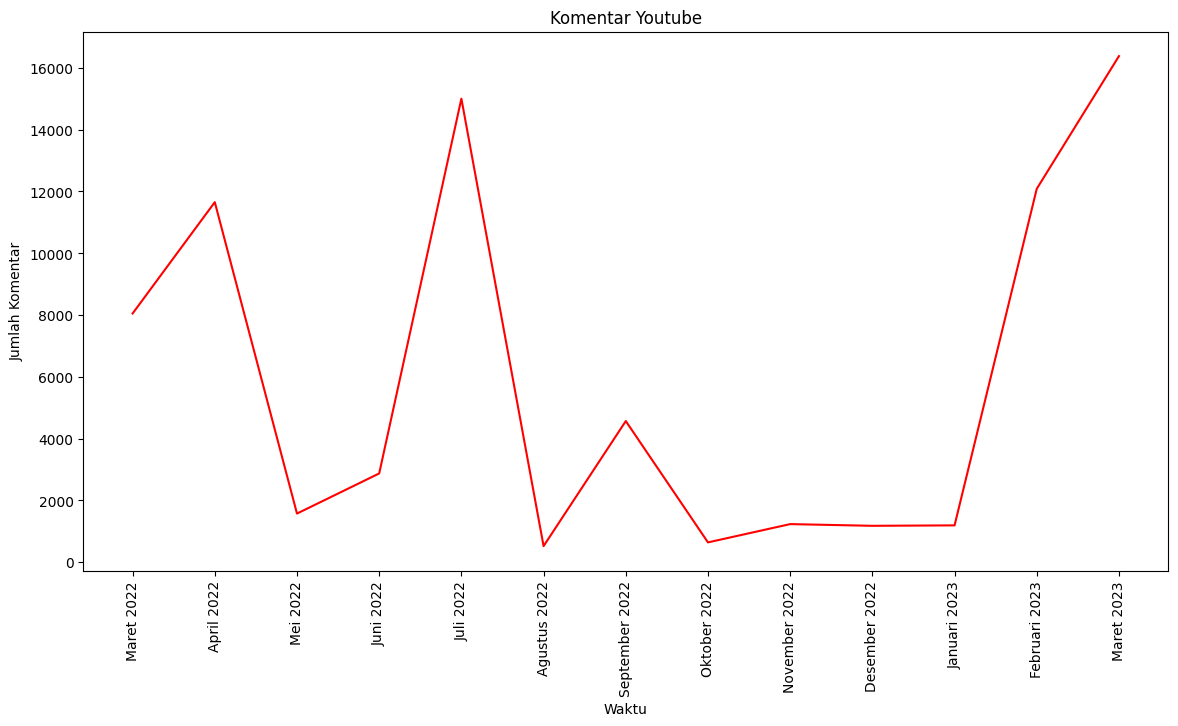

In [7]:
g = dataset.groupby('waktu').count()
g = g.sort_index()

plt.figure(figsize=(14, 7))
plt.plot(g.index, g.text, c='r')
plt.xticks(g.index, dataset.time.unique(), rotation=90) 
plt.title('Komentar Youtube')
plt.xlabel("Waktu")
plt.ylabel("Jumlah Komentar")
plt.show()


In [8]:
class sentistrength:
    def __init__(self, config=dict()):
        self.negasi = [line.replace('\n','') for line in open("negatingword.txt").read().splitlines()]
        self.tanya = [line.replace('\n','') for line in open("questionword.txt").read().splitlines()]
        #create sentiment words dictionary
        self.sentiwords_txt = [line.replace('\n','').split(":") for line in open("sentiwords_id.txt").read().splitlines()]
        self.sentiwords_dict = OrderedDict()
        for term in self.sentiwords_txt:
            self.sentiwords_dict[term[0]] = int(term[1])
        #create emoticon dictionary
        self.emoticon_txt = [line.replace('\n','').split(" | ") for line in open("emoticon_id.txt").read().splitlines()]
        self.emoticon_dict = OrderedDict()
        for term in self.emoticon_txt:
            self.emoticon_dict[term[0]] = int(term[1])
        #create idioms dictionary
        self.idioms_txt = [line.replace('\n','').split(":") for line in open("idioms_id.txt").read().splitlines()]
        self.idioms_dict = OrderedDict()
        for term in self.idioms_txt:
            self.idioms_dict[term[0]] = int(term[1])
        #create boosterwords dictionary
        self.boosterwords_txt = [line.replace('\n','').split(":") for line in open("boosterwords_id.txt").read().splitlines()]
        self.boosterwords_dict = OrderedDict()
        for term in self.boosterwords_txt:
            self.boosterwords_dict[term[0]] = int(term[1])
        self.negation_conf = config["negation"]
        self.booster_conf = config["booster"]
        self.ungkapan_conf = config["ungkapan"]
        self.consecutive_conf = config["consecutive"]
        self.repeated_conf = config["repeated"]
        self.emoticon_conf = config["emoticon"]
        self.question_conf = config["question"]
        self.exclamation_conf = config["exclamation"]
        self.punctuation_conf = config["punctuation"]
        self.mean_conf = False

    def senti(self,term):
        try:
            return self.sentiwords_dict[term]
        except:
            return 0

    def emosikon(self,term):
        try:
            return self.emoticon_dict[term]
        except:
            return 0

    def ungkapan(self,term):
        try:
            return self.idioms_dict[term]
        except:
            return 0

    def booster(self, term):
        try:
            return self.boosterwords_dict[term]
        except:
            return 0

    def cek_negationword(self, prev_term, prev_term2):
        #jika kata sebelumnya (index-1) adalah kata negasi, negasikan nilai -+nya
        if prev_term in self.negasi or prev_term2+" "+prev_term in self.negasi:
            # print prev_term
            self.score = -abs(self.score) if self.score>0 else abs(self.score)

    def cek_boosterword(self,term):
        booster_score = self.booster(term)
        if booster_score !=0 and self.score>0: self.score += booster_score
        if booster_score !=0 and self.score<0: self.score -= booster_score

    def cek_consecutive_term(self, prev_term):
        if self.prev_score>0 and self.score >=3: self.score+=1 
        if self.prev_score<0 and self.score <=-3: self.score-=1 

    def cek_ungkapan(self, bigram,trigram, i):
        bigram = ' '.join(bigram)
        trigram = ' '.join(trigram)
        ungkapan_score = self.ungkapan(bigram)
        if ungkapan_score==0:
            ungkapan_score = self.ungkapan(trigram)
        if ungkapan_score!=0:
            self.score = ungkapan_score
            self.prev_score = 0
            self.pre_max_pos[i-1] = 1
            self.pre_max_neg[i-1] = -1
            self.max_pos = self.pre_max_pos[i-2] #if len(self.pre_max_pos)>1 else 1
            self.max_neg = self.pre_max_neg[i-2] #if len(self.pre_max_neg)>1 else -1
            self.sentence_score[i-1] = re.sub(r'\[\d\]','',self.sentence_score[i-1])

    def cek_repeated_punctuation(self, next_term):
        if re.search(r'!{2,}',next_term) and self.score >=3: self.score+=1
        if re.search(r'!{2,}',next_term) and self.score <=-3: self.score-=1

    def remove_extra_repeated_char(self, term):
        return re.sub(r'([A-Za-z])\1{2,}',r'\1',term)
    def plural_to_singular(self, term):
        return re.sub(r'([A-Za-z]+)\-\1', r'\1',term)
    def classify(self):
        result = "neutral"
        try:
            if self.mean_conf:
                mean_p = np.mean(self.mean_pos)
                mean_n = np.mean(self.mean_neg)
                print (mean_p, mean_n)
                if mean_p > mean_n:
                    result = "positive"
                elif mean_p < mean_n and not self.is_tanya:
                    result = "negative"
                elif mean_p < mean_n and self.is_tanya:
                    result = "neutral"
            else:
                if abs(self.sentences_max_pos) > abs(self.sentences_max_neg):
                    result = "positive"
                elif abs(self.sentences_max_pos) < abs(self.sentences_max_neg):
                    result = "negative"
                elif abs(self.sentences_max_pos) == abs(self.sentences_max_neg):
                    result = "neutral"
        except:
            print ("error ",self.sentences_max_pos, self.sentences_max_neg)
        return result
    def cek_neutral_term(self,terms,i):
        if terms[i-1] in self.neutral_term or terms[i+1] in self.neutral_term: self.score=1 

    def main(self,sentence):
        self.neutral_term = ['jika','kalau']
        sentences = sentence.split('.')
        self.sentences_max_neg = -1
        self.sentences_max_pos = 1
        self.sentences_score = []
        self.sentences_text = []
        for sentence in sentences:
            self.max_neg = -1
            self.max_pos = 1
            self.mean_neg = [1]
            self.mean_pos = [1]
            self.sentence_score=[]
            terms = sentence.split()
            # terms = re.split(r'[\s,.]',sentence)
            terms_length = len(terms)
            self.is_tanya = False
            self.sentence_text = ''
            # print self.max_pos, self.max_neg
            #SEMUA KALIMAT YANG MEMILIKI TANDA SERU MEMILIKI +ve minimal 2
            if self.exclamation_conf and re.search('!',sentence): self.max_pos = 2
            self.prev_score = 0
            self.pre_max_pos = []
            self.pre_max_neg = []
            for i,term in enumerate(terms):
                # repeated_term = ''
                is_extra_char = False
                plural = ''
                self.score = 0
                # if re.search(r'[A-Za-z\-.]+',term):
                # print term
                if re.search(r'([A-Za-z])\1{3,}',term):
                    is_extra_char = True
                    # repeated_term =term
                term = self.remove_extra_repeated_char(term)
                if re.search(r'([A-Za-z]+)\-\1',term):
                    plural = term
                    term = self.plural_to_singular(term)
                #GET SENTI SCORE#
                self.score = self.senti(term)
                # print "senti score",term, self.score

                #NEGATION HANDLER#
                if self.negation_conf and self.score !=0 and i>0:self.cek_negationword(terms[i-1],terms[i-2])
                # print  "negation score",term, self.score

                #BOOSTERWORD HANDLER#
                if self.booster_conf and self.score !=0 and i>0 and i<=(terms_length-1):self.cek_boosterword(terms[i-1])
                if self.booster_conf and self.score !=0 and i>=0 and i<(terms_length-1):self.cek_boosterword(terms[i+1])
                # print  "booster score",term, self.score

                #IDIOM/UNGKAPAN HANDLER#
                if self.ungkapan_conf and i>0 and i<=(terms_length-1):self.cek_ungkapan([terms[i-1],term],[terms[i-2],terms[i-1],term],i)
                # if self.ungkapan_conf and i>=0 and i<(terms_length-1):self.cek_ungkapan([term,terms[i+1]])
                # print  "idiom score",term, self.score

                #CONSECUTIVE SENTIMENT WORD#
                if self.consecutive_conf and i>0 and i<=(terms_length-1) and self.score !=0:self.cek_consecutive_term(terms[i-1])
                # print  "consecutive score",term, self.score

                #+1 SENTI SCORE IF REPEATED CHAR ON POSITIVE/NEGATIVE +2 IF NEUTRAL TERM
                if self.repeated_conf and is_extra_char==True and self.score>0: self.score+=1
                if self.repeated_conf and is_extra_char==True and self.score<0: self.score-=1
                if self.repeated_conf and is_extra_char==True and self.score==0: self.score=2
                # print  "repeat char score", term, self.score
                if self.punctuation_conf and i>=0 and i<(terms_length-1): self.cek_repeated_punctuation(terms[i+1])
                # CEK APAKAH TERDAPAT KATA TANYA
                if self.question_conf and (term in self.tanya or re.search(r'\?',term)):self.is_tanya = True
                # CEK neutral term 
                if self.score!=0 and i>1 and i<(terms_length-2): self.cek_neutral_term(terms,i)
                # if self.score!=0 and i>0 and i<(terms_length-4): self.cek_neutral_term(terms,i)
                if self.emoticon_conf and self.score==0: self.score = self.emosikon(term)

                self.prev_score = self.score
                if self.mean_conf and self.score>0: self.mean_pos.append(self.score)	
                if self.mean_conf and self.score<0: self.mean_neg.append(abs(self.score))
                #GET MAX SCORE +ve/-ve	
                self.max_pos= self.score if self.score > self.max_pos else self.max_pos
                self.max_neg= self.score if self.score < self.max_neg else self.max_neg
                #insert score info current term
                self.pre_max_pos.append(self.max_pos)
                self.pre_max_neg.append(self.max_neg)
                # print self.pre_max_pos, self.pre_max_neg
                if plural !='': term = plural
                self.sentence_text += ' {}'.format(term)
                if self.score != 0:term = "{} [{}]".format(term, self.score)
                self.sentence_score.append(term)

            self.sentences_text.append(self.sentence_text)
            self.sentences_score.append(" ".join(self.sentence_score))
            if self.is_tanya: 
                self.max_neg = -1
            self.sentences_max_pos = self.max_pos if self.max_pos > self.sentences_max_pos else self.sentences_max_pos
            self.sentences_max_neg = self.max_neg if self.max_neg < self.sentences_max_neg else self.sentences_max_neg
            # print self.sentences_max_pos, self.sentences_max_neg
        sentence_result = self.classify()
        # print self.sentences_text
        return sentence_result

config = dict()
config["negation"] = True
config["booster"]  = True
config["ungkapan"]  = True
config["consecutive"]  = True
config["repeated"]  = True
config["emoticon"]  = True
config["question"]  = True
config["exclamation"]  = True
config["punctuation"]  = True
senti = sentistrength(config)

In [9]:
dataset['sentiment']=dataset['text'].apply(lambda x : senti.main(x))

In [10]:
stats=dataset.drop(columns=["time","waktu"]).groupby("sentiment").count().reset_index()
stats

,sentiment,text
0,negative,16472
1,neutral,25299
2,positive,35177


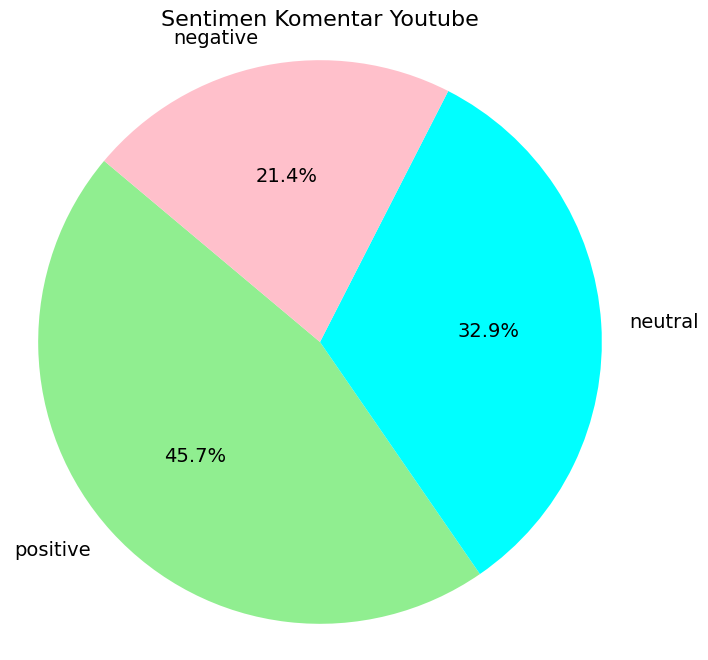

In [11]:
colors = {'negative': 'pink', 'neutral': 'cyan', 'positive': 'lightgreen'}
stats = dataset  

sentiment_counts = stats['sentiment'].value_counts()

sentiment_labels = sentiment_counts.index.astype(str).tolist()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_labels, colors=[colors[s] for s in sentiment_counts.index],  autopct='%1.1f%%', startangle=140,textprops=  {'fontsize': 14})
plt.title('Sentimen Komentar Youtube', fontsize=16)
plt.axis('equal') 

plt.show()

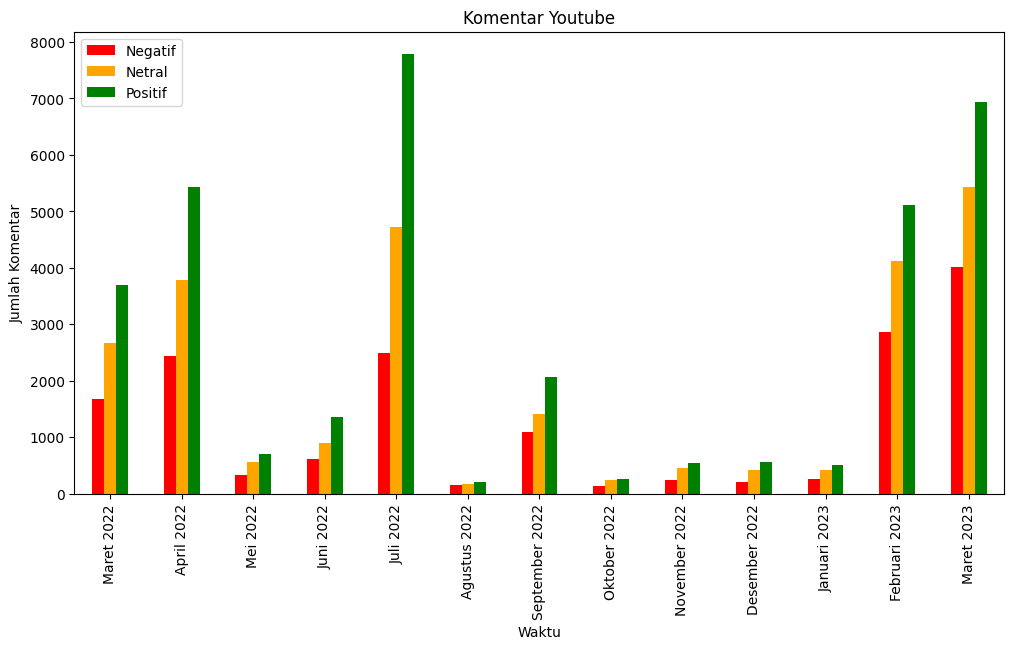

In [12]:
f = dataset.groupby(["waktu", "sentiment"]).count()
f.reset_index(inplace=True)
df = f.pivot(index="waktu", columns="sentiment", values="text")
df = df.sort_index()
time_labels = dataset['time'].unique()
colors = {'positive': 'green', 'neutral': 'orange', 'negative': 'red'}

ax = df.plot(kind="bar", figsize=(12, 6),color=[colors[column] for column in df.columns])
ax.set_xlabel("Waktu")
ax.set_ylabel("Jumlah Komentar")
ax.set_title("Komentar Youtube")
ax.legend(['Negatif', 'Netral', 'Positif'])
plt.xticks(range(len(df.index)), time_labels, rotation=90)
plt.show()

In [13]:
custom_stopwords = ["klo","yg", "aamiin", "swt", "km", "dia", "dn","aja","ga","ya","utk","bpk","sih","org","tdk","sdh","dg","dgn","sy","di","gak","ri","n","tp","amin","dr"
                    ,"orang","kau","lu","jgn","dlm","jg","pa","nya","kalo","udah","gini","aja"]

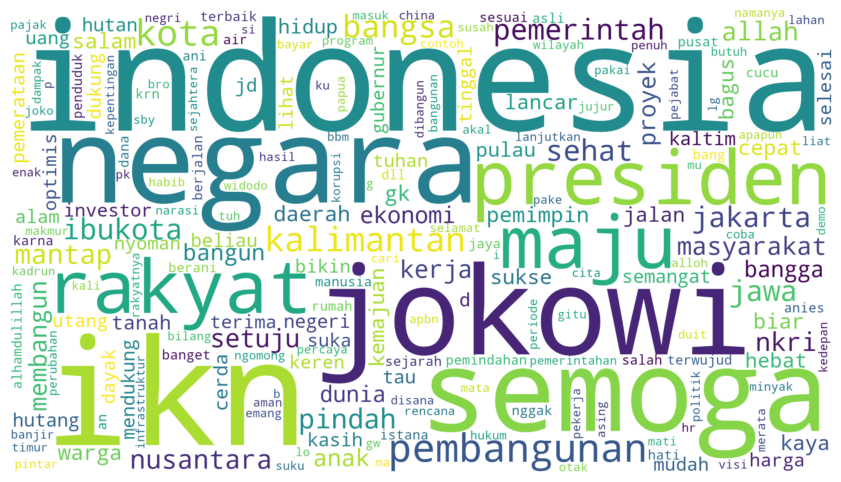

In [14]:
all_stopwords = set(stopwords.words("indonesian") + custom_stopwords)

filtered_df = dataset[dataset['sentiment'] == "positive"]
text = filtered_df.text.str.cat(sep=' ')

wordcloud = WordCloud(stopwords=all_stopwords, background_color="white", width=1920, height=1080, collocations=False).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

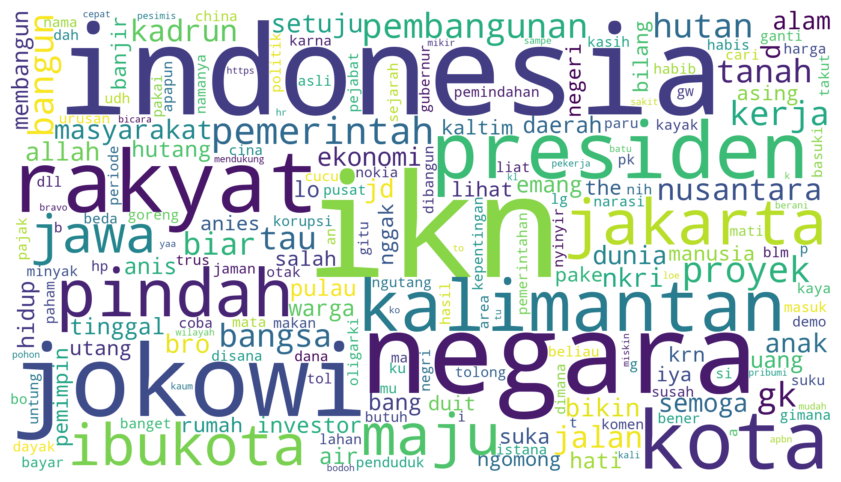

In [15]:
all_stopwords = set(stopwords.words("indonesian") + custom_stopwords)

filtered_df = dataset[dataset['sentiment'] == "neutral"]
text = filtered_df.text.str.cat(sep=' ')

wordcloud = WordCloud(stopwords=all_stopwords, background_color="white", width=1920, height=1080, collocations=False).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

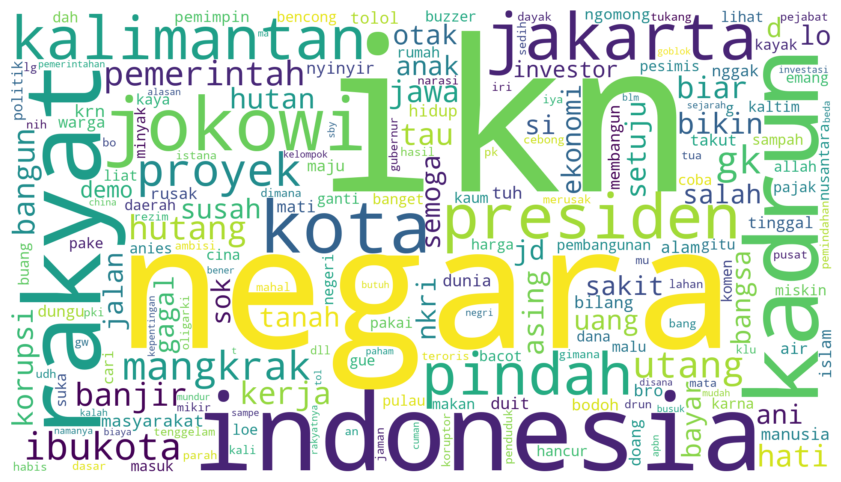

In [16]:
all_stopwords = set(stopwords.words("indonesian") + custom_stopwords)

filtered_df = dataset[dataset['sentiment'] == "negative"]
text = filtered_df.text.str.cat(sep=' ')

wordcloud = WordCloud(stopwords=all_stopwords, background_color="white", width=1920, height=1080, collocations=False).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()